In [1]:
#Usual imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
#load dataset
df = pd.read_csv('Clustering_GCLmIHC_200210.csv')[:3717].T[1:12].T
df.shape #reads out imported dataset dimentionality
df.head(5000)

,Brn3a-_neg,CalR+,MEIS2+,CAVIII+,FOXP2+,Syt6+,Syt10+,Satb2+,RBPMS+,Pvalb_neg,CalB_neg
0,1,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3712,0,0,0,0,0,0,0,0,0,1,1
3713,0,0,0,0,0,1,0,0,0,0,0
3714,1,0,0,0,0,0,0,0,0,0,0
3715,1,0,0,0,0,0,0,0,0,1,1


In [26]:
#imports for clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=30)
clustering.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=30,
                        pooling_func='deprecated')

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

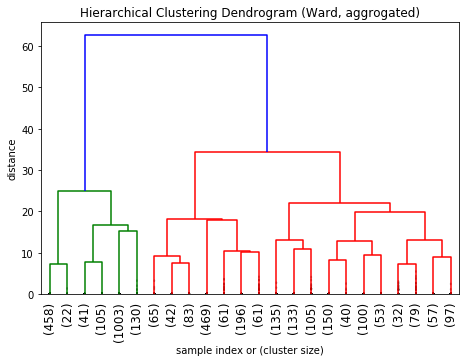

In [97]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [29]:
clusterAssignment = clustering.labels_
print(clusterAssignment)

[16 28 23 ...  7 16  5]


In [30]:
clusterAssignment

array([16, 28, 23, ...,  7, 16,  5], dtype=int32)

In [31]:
#np.savetxt("ClusterAssignment_GCAC_200210.csv", clusterAssignment, delimiter=",")

In [39]:
len(clusterAssignment)

3717

In [48]:
type(np.array(df.iloc[[0,1,2,3]])[0])

numpy.ndarray

In [54]:
#diff
abs(np.add(np.array(df.iloc[[0,1,2,3]])[1], -np.array(df.iloc[[0,1,2,3]])[0]))

array([-1, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0], dtype=object)

In [60]:
#sim
np.logical_and(np.array(df.iloc[[0,1,2,3]])[3], np.array(df.iloc[[0,1,2,3,4]])[4])

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=object)

In [77]:
clusterlist = [[] for i in range(max(clusterAssignment) + 1)]
for i in range(len(clusterAssignment)):
    clusterlist[clusterAssignment[i]].append(i)

In [172]:
simdiff(1, 2)

Sims:  [3, 4, 5, 7, 8, 1, 6, 2, 0, 9, 10]
Diffs:  [10, 9, 0, 2, 6, 1, 8, 3, 4, 5, 7]


(array([1509, 7425, 2970, 8235, 8235, 8235, 7020, 8235, 7930, 1080,    0]),
 array([6726,  810, 5265,    0,    0,    0, 1215,    0,  305, 7155, 8235]))

In [171]:
def simdiff(class_a, class_b, clusterlist=clusterlist):
    class_a = np.array(df.iloc[clusterlist[class_a]])
    class_b = np.array(df.iloc[clusterlist[class_b]])
    sim = np.zeros((len(class_a[0]),), dtype=int)
    diff = np.zeros((len(class_a[0]),), dtype=int)
    for a in class_a:
        for b in class_b:
            a = np.array(a)
            b = np.array(b)
            #print(type(a))
            #print(type(b))
            x = np.array(np.logical_xor(list(a),list(b)))
            #sim
            sim = np.add(sim, ~x)
            #diff
            diff = np.add(diff, x)
    print("Sims: ", sorted(range(len(sim)), key=lambda k: -sim[k]))
    print("Diffs: ", sorted(range(len(diff)), key=lambda k: -diff[k]))
    return sim, diff

In [144]:
np.logical_xor(np.array([0,0,1,1]), np.array([0,0,1,1]))

array([False, False, False, False])

In [158]:
np.logical_xor(list(z[0]), list(z[1]))

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [178]:
pd.DataFrame(linkage_matrix)

,0,1,2,3
0,0.0,18.0,0.000000,2.0
1,1.0,69.0,0.000000,2.0
2,2.0,14.0,0.000000,2.0
3,3.0,6.0,0.000000,2.0
4,4.0,26.0,0.000000,2.0
...,...,...,...,...
3711,7421.0,7422.0,19.751909,608.0
3712,7423.0,7428.0,22.082010,981.0
3713,7411.0,7425.0,24.914604,1759.0
3714,7427.0,7429.0,34.265525,1958.0


In [ ]:
# A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.